In [225]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier



In [174]:
df=pd.read_csv('train_Insurance.csv')
df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [176]:
df.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [177]:
df=df.drop(columns=['Customer Id'])
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [178]:
df1=df[df.duplicated()]
df1.head()
df1.shape

(42, 12)

In [179]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [180]:
df.isnull().sum()

YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    45
Building_Type          0
NumberOfWindows        0
Geo_Code              41
Claim                  0
dtype: int64

In [181]:
df.shape

(4970, 12)

In [182]:
df["Geo_Code"].nunique()

1115

In [183]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(df.loc[:,['Geo_Code']])
df[['Geo_Code']]=arr

In [184]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(df.loc[:,['Garden']])
df[['Garden']]=arr

In [185]:
df.isnull().sum()

YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension    45
Building_Type          0
NumberOfWindows        0
Geo_Code               0
Claim                  0
dtype: int64

In [186]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
arr=mf_imputer.fit_transform(df.loc[:,['Building Dimension']])
df[['Building Dimension']]=arr
df.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [187]:
df["Claim"].value_counts()

Claim
non    3849
oui    1121
Name: count, dtype: int64

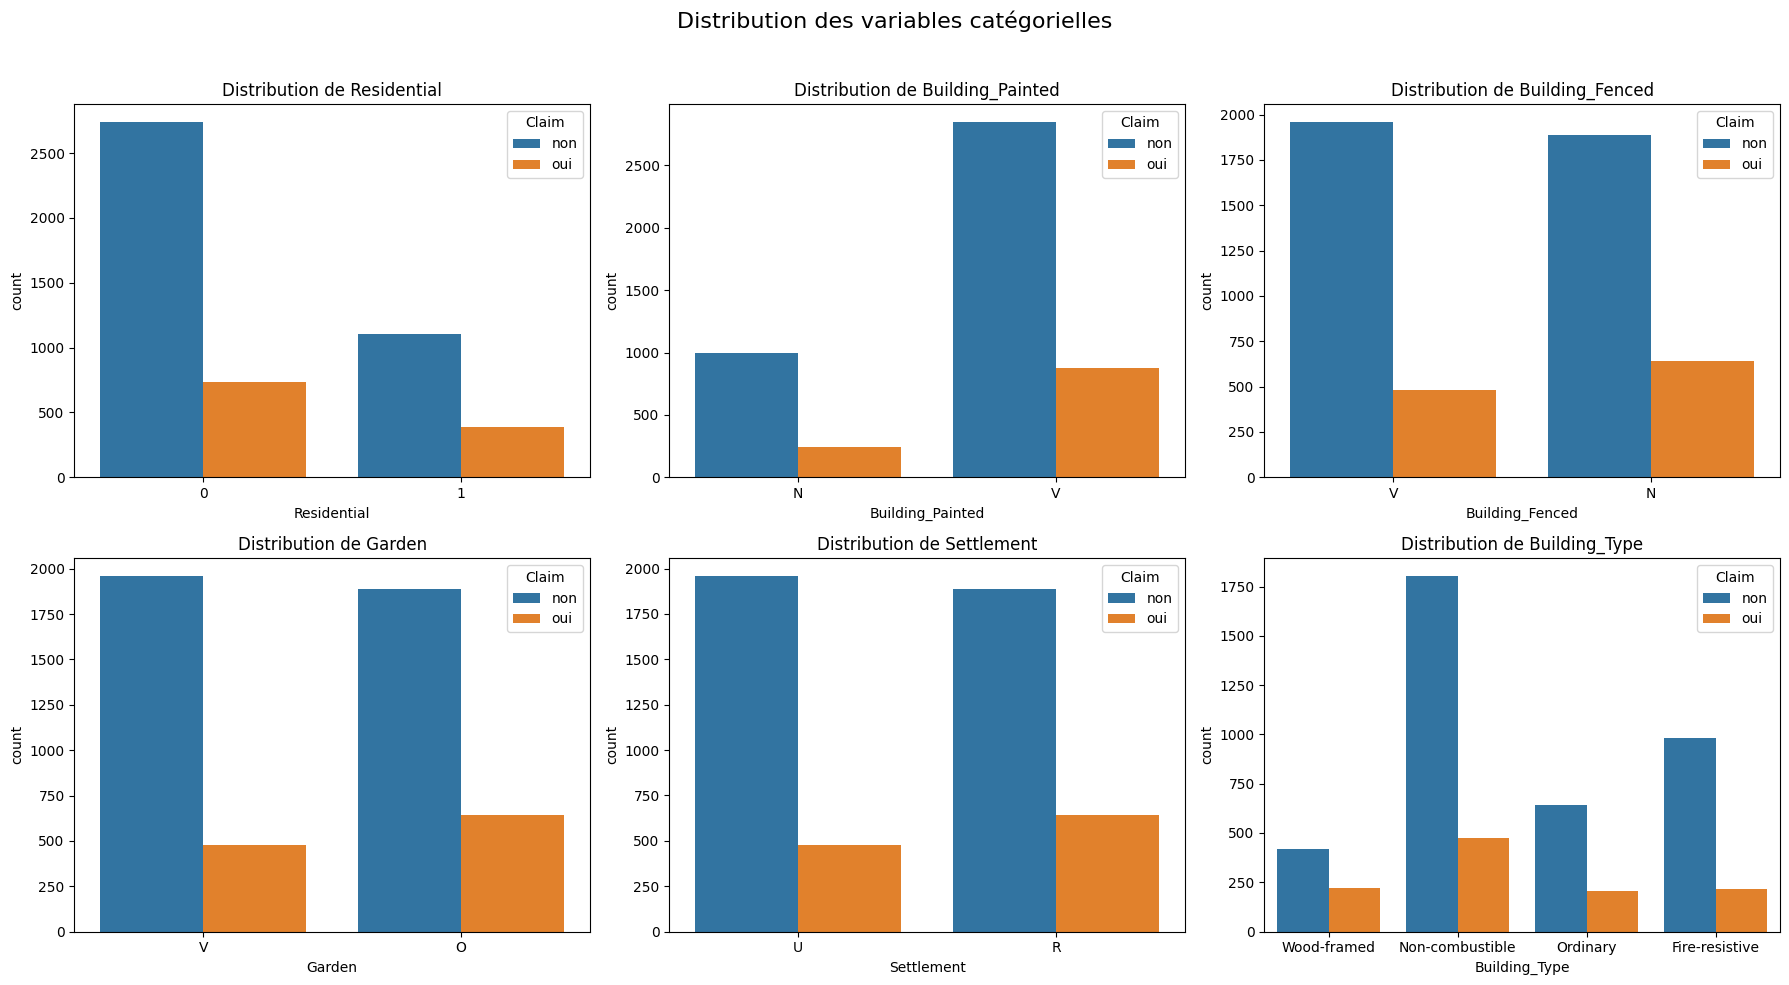

In [188]:
categorical_features = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']

# Créer une grille de sous-graphes avec 3 graphiques par ligne
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 lignes, 3 colonnes
fig.suptitle("Distribution des variables catégorielles", fontsize=16)

# Boucle pour chaque variable catégorielle
for i, feature in enumerate(categorical_features):
    row = i // 3  # Détermine la ligne
    col = i % 3   # Détermine la colonne
    sns.countplot(data=df, x=feature, hue='Claim', ax=axes[row, col])
    axes[row, col].set_title(f"Distribution de {feature}")

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de l'espace pour le titre général
plt.show()

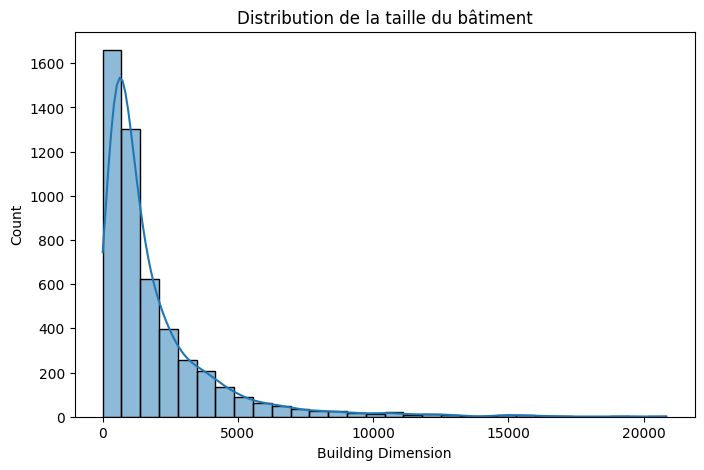

In [189]:
# Distribution de la taille du bâtiment
plt.figure(figsize=(8, 5))
sns.histplot(df['Building Dimension'], kde=True, bins=30)
plt.title("Distribution de la taille du bâtiment")
plt.show()

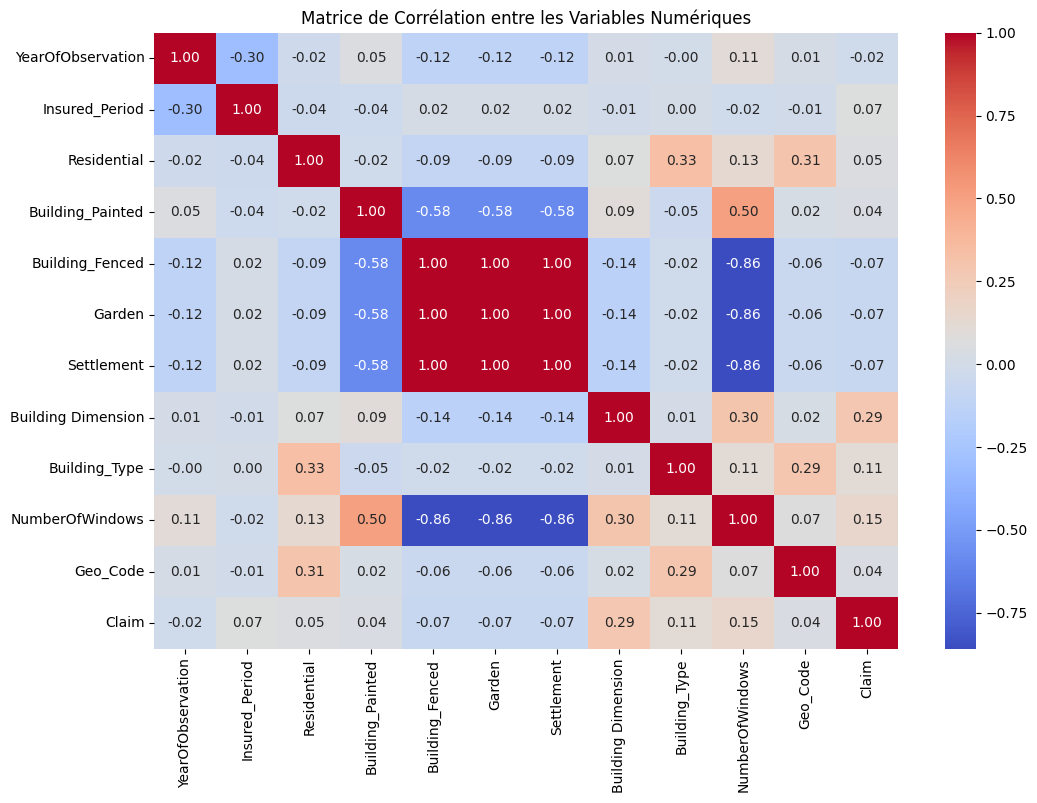

In [212]:
# Corrélation entre les variables numériques
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation entre les Variables Numériques")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2400\844912995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Claim', palette='Set2')


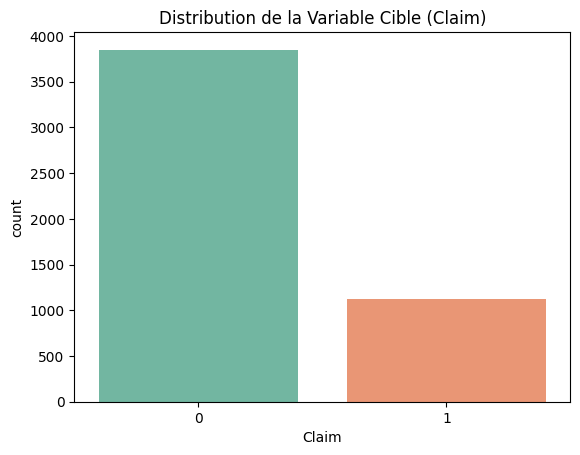

In [213]:
# Distribution de la variable cible
sns.countplot(data=df, x='Claim', palette='Set2')
plt.title("Distribution de la Variable Cible (Claim)")
plt.show()

In [191]:
# Encoder les variables catégorielles avec LabelEncoder
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Encoder la variable cible
df['Claim'] = df['Claim'].apply(lambda x: 1 if x == 'oui' else 0)

In [192]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace({'without': 0, '>=10': 10})

# 2. Convertir la colonne en numérique
df['NumberOfWindows'] = pd.to_numeric(df['NumberOfWindows'], errors='coerce')

In [193]:
df['NumberOfWindows']=df['NumberOfWindows'].astype('int')
df['NumberOfWindows'].value_counts()

NumberOfWindows
0     2440
4      665
3      598
5      436
2      245
6      225
7      141
8       84
10      52
1       49
9       35
Name: count, dtype: int64

In [194]:
df2=df

In [195]:
non_numeric_geo_codes = df[~df['Geo_Code'].str.isnumeric()]['Geo_Code'].unique()
print("Valeurs non numériques dans 'Geo_Code' :", non_numeric_geo_codes)

Valeurs non numériques dans 'Geo_Code' : ['2A004' '2A090' '2A247' '2B096' '2B033' '2B042' '2B050']


df With Encoding

In [196]:
le = LabelEncoder()

# Appliquer l'encodage
df['Geo_Code'] = le.fit_transform(df['Geo_Code'])


df2  with Median

In [197]:
df2['Geo_Code'] = pd.to_numeric(df['Geo_Code'], errors='coerce')  # Convertir les valeurs numériques, autres en NaN
df2['Geo_Code'].fillna(df2['Geo_Code'].median(), inplace=True)  # Remplacer les NaN par la médiane (par exemple)

C:\Users\hp\AppData\Local\Temp\ipykernel_2400\2402907581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Geo_Code'].fillna(df2['Geo_Code'].median(), inplace=True)  # Remplacer les NaN par la médiane (par exemple)


In [198]:
# Séparer les classes majoritaire et minoritaire
df_majority = df[df['Claim'] == 0]
df_minority = df[df['Claim'] == 1]

# Suréchantillonner la classe minoritaire
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Échantillonnage avec remise
                                 n_samples=len(df_majority),  # Égaliser le nombre avec la classe majoritaire
                                 random_state=42)  # Pour la reproductibilité

# Combiner les échantillons
df3 = pd.concat([df_majority, df_minority_upsampled])

# Vérifier la distribution
print(df3['Claim'].value_counts())





Claim
0    3849
1    3849
Name: count, dtype: int64


In [199]:
# Diviser les données en X (features) et y (target)
X2 = df.drop('Claim', axis=1)
y2 = df['Claim']

# Appliquer SMOTE pour générer de nouvelles instances synthétiques
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

df4=pd.concat([X_resampled, y_resampled], axis=1)

# Vérifier la distribution après SMOTE
print(pd.Series(y_resampled).value_counts())
print(df4.shape)

Claim
0    3849
1    3849
Name: count, dtype: int64
(7698, 12)


In [200]:
dfx=df4[df4.duplicated()]
dfx.head()
dfx.shape

(62, 12)

In [201]:
dfx=df4[df4.duplicated()]
dfx.head()
dfx.shape

(62, 12)

In [202]:
df["Geo_Code"].dtype

dtype('int64')

In [203]:
df3.shape

(7698, 12)

In [204]:
df2.shape

(4970, 12)

In [205]:
dfx=df[df.duplicated()]
dfx.head()
dfx.shape

(1, 12)

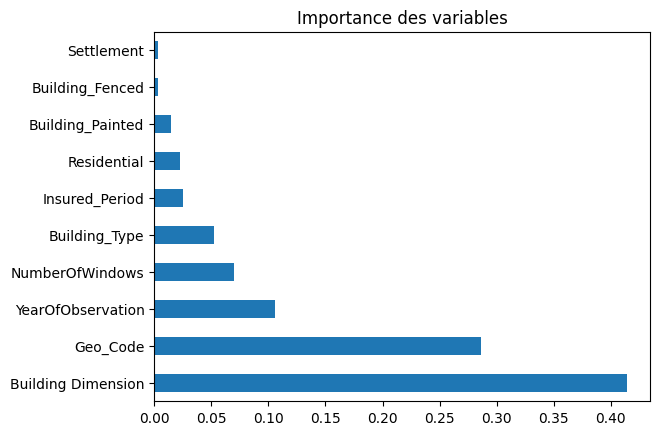

In [206]:
# Séparer les features et la target
X = df3.drop(['Claim'], axis=1)
y = df3['Claim']

# Appliquer un modèle de forêt aléatoire pour obtenir l'importance des variables
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Importance des variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des variables")
plt.show()

Resultat d augmentation avec duplicated

Accuracy: 0.8948051948051948
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       782
           1       0.85      0.95      0.90       758

    accuracy                           0.89      1540
   macro avg       0.90      0.90      0.89      1540
weighted avg       0.90      0.89      0.89      1540



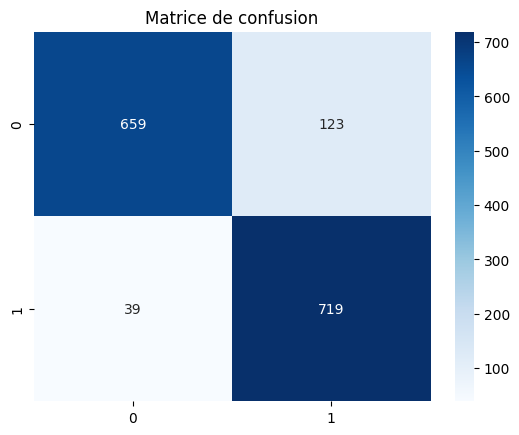

In [207]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle (exemple avec RandomForest)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)

# Prédire et évaluer
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Accuracy: 0.8948051948051948
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       782
           1       0.85      0.95      0.90       758

    accuracy                           0.89      1540
   macro avg       0.90      0.90      0.89      1540
weighted avg       0.90      0.89      0.89      1540



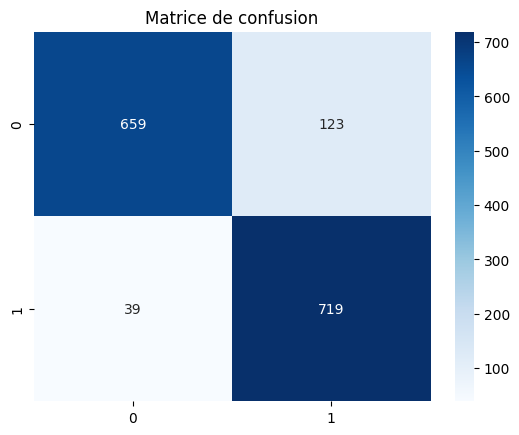

In [208]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle (exemple avec RandomForest)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)

# Prédire et évaluer
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Resultat d augmentation sans duplicated

In [209]:
X3 = df4.drop(['Claim'], axis=1)
y3 = df4['Claim']

Accuracy: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       780
           1       0.81      0.80      0.81       760

    accuracy                           0.81      1540
   macro avg       0.81      0.81      0.81      1540
weighted avg       0.81      0.81      0.81      1540



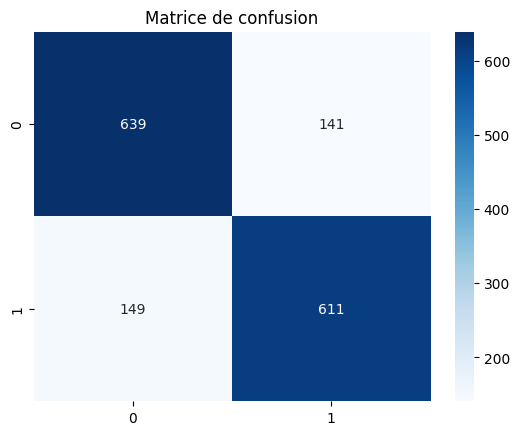

In [210]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Entraîner un modèle (exemple avec RandomForest)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)

# Prédire et évaluer
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Accuracy: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       780
           1       0.81      0.80      0.81       760

    accuracy                           0.81      1540
   macro avg       0.81      0.81      0.81      1540
weighted avg       0.81      0.81      0.81      1540



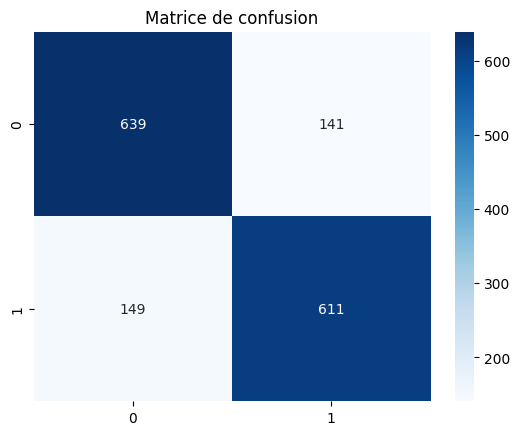

In [211]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Entraîner un modèle (exemple avec RandomForest)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)

# Prédire et évaluer
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [ ]:
###  use  stacking



In [220]:


# Define the base models
base_models = [
    ('lr', LogisticRegression()),  # Logistic Regression
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest
    ('mlp', MLPClassifier(random_state=42, max_iter=300))  # Neural Network
]


In [222]:
from sklearn.ensemble import GradientBoostingClassifier

In [223]:
# Modèle méta
meta_model = GradientBoostingClassifier(random_state=42)  # Modèle de niveau supérieur

In [228]:
# Construction du modèle de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

c:\Users\hp\Desktop\Ml_Project\Assurance-Habitation-Pr-diction-Accidents\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\Ml_Project\Assurance-Habitation-Pr-diction-Accidents\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=300, random_state=42))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [229]:
y_pred = stacking_model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 93.57%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       782
           1       0.94      0.92      0.93       758

    accuracy                           0.94      1540
   macro avg       0.94      0.94      0.94      1540
weighted avg       0.94      0.94      0.94      1540

